# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [4]:
train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [6]:
test.isna().sum()

title          0
description    1
itemid         0
dtype: int64

In [3]:
train.fillna('', inplace=True)
test.fillna('', inplace=True)

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [4]:
train['text'] = train['title'] + ' ' + train['description']
test['text'] = test['title'] + ' ' + test['description']

In [9]:
# Сразу отрезаем 100к наблюдений
train100 = train.sample(n=100000, random_state=123)
train100.head()

,title,description,Category_name,Category,text
3111607,Ваза напольная итальянской фабрики,Ваза красная напольная. размеры на фото. фабри...,Мебель и интерьер,20,Ваза напольная итальянской фабрики Ваза красна...
3608642,Коляска б/у Lambada,2 в1 и 3в1 в идеальном состоянии!,Товары для детей и игрушки,30,Коляска б/у Lambada 2 в1 и 3в1 в идеальном сос...
2061669,Резина на полуприцеп,Резина на запаску. Без латок и порезов. Остато...,Запчасти и аксессуары,10,Резина на полуприцеп Резина на запаску. Без ла...
2785016,Платье Gulliver 2-3 года,"В идеальном состоянии, очень дорого выглядит, ...",Детская одежда и обувь,29,Платье Gulliver 2-3 года В идеальном состоянии...
1232002,Зимние сапоги skandia,Зимние сапоги,Детская одежда и обувь,29,Зимние сапоги skandia Зимние сапоги


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [10]:
# Количество уникальных классов
train100['Category'].nunique()

50

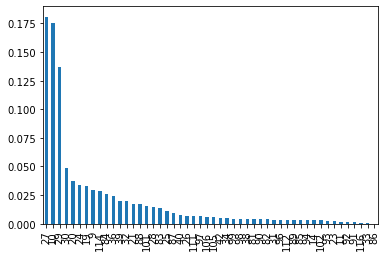

In [11]:
# Доли категорий в выборке
(train100['Category'].value_counts()/(train100.shape[0])).plot(kind='bar');

In [12]:
maxx = (train100['Category'] == 27).mean()
minn = (train100['Category'] == 86).mean()
print(f'Класс 27 имеет максимальную долю = {maxx}')
print(f'Класс 86 имеет минимальную долю = {minn}')

Класс 27 имеет максимальную долю = 0.18104
Класс 86 имеет минимальную долю = 5e-05


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
texts = train100['text']
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts]

In [60]:
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(texts_tokenized)

In [16]:
# Посмотрим на размер матрицы
X

<100000x166926 sparse matrix of type '<class 'numpy.int64'>'
	with 2975258 stored elements in Compressed Sparse Row format>

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [17]:
# создаем словарь
voc = cnt_vec.vocabulary_

In [18]:
# Ищем слова, начинающиеся на цифру
dig = [w for w in list(voc.keys()) if w[0].isdigit()]
len(dig)

0

In [6]:
# Ищем слова, начинающиеся на символы пунктуации
from string import punctuation
punc = [w for w in list(voc.keys()) if w[0] in punctuation]
len(punc)

NameError: name 'voc' is not defined

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числительные и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [8]:
def tokenizer(stroka):
    '''
    Функция принимает строку и обрабатывает ее, как описано в задании
    '''
    tokens = [w for w in word_tokenize(stroka.lower()) if w.isalpha()] # Создаем список из буквенных токенов
    stemmer = SnowballStemmer('russian')
    ready_stroka = [stemmer.stem(w) for w in tokens if w not in stopwords.words('russian')] # Удаляем стоп-слова и проводим стемминг
    return ready_stroka

In [22]:
# Проверяем выполнение на первой строке
str1 = list(texts)[0]
tokenizer(str1)

['ваз',
 'напольн',
 'итальянск',
 'фабрик',
 'ваз',
 'красн',
 'напольн',
 'размер',
 'фот',
 'фабрик',
 'fdc',
 'керамик',
 'ваз',
 'трещин',
 'заводск',
 'брак',
 'удар',
 'см',
 'фот',
 'самовывоз']

In [24]:
import time
start_time = time.time()
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts]
print('На 100к строк это заняло', time.time() - start_time, "seconds")

На 100к строк это заняло 61.415704011917114 seconds


## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [9]:
#Создаем новый датасет
train500 = train.sample(n=500000, random_state=123)
texts500 = train500['text']

In [10]:
# Токенизируем строки
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts500]

In [11]:
#Строим CountVectorizer
cnt_vec = CountVectorizer()
X_cnt_vec = cnt_vec.fit_transform(texts_tokenized)

In [14]:
X_cnt_vec.shape

(500000, 377840)

In [12]:
#Строим TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_df=0.9)
X_tf = tfidf_vec.fit_transform(texts_tokenized)
X_tf.shape

(500000, 377840)

In [13]:
#Строим HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(n_features = 30000)
X_h = hash_vec.fit_transform(texts_tokenized)
X_h.shape

(500000, 30000)

In [15]:
from sklearn.model_selection import train_test_split
y = train500['Category']
X_train, X_test, y_train, y_test = train_test_split(X_cnt_vec, y, test_size=0.2, random_state=123)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd_cnt = SGDClassifier()
sgd_cnt.fit(X_train, y_train)

SGDClassifier()

In [30]:
y_pred = sgd_cnt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.86016


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(texts_tokenized)
X.shape

(500000, 377840)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sgd_tfidf = SGDClassifier()
sgd_tfidf.fit(X_train, y_train)

SGDClassifier()

In [33]:
y_pred = sgd_tfidf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.83566


Теперь уберем часто встречающиеся слова

In [34]:
tfidf_vec = TfidfVectorizer(max_df=0.9)
X = tfidf_vec.fit_transform(texts_tokenized)
X.shape

(500000, 377840)

In [43]:
tfidf_vec = TfidfVectorizer(max_df=0.5)
X = tfidf_vec.fit_transform(texts_tokenized)
X.shape

(500000, 377840)

Размер матрицы не поменялся.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sgd_tfidf = SGDClassifier()
sgd_tfidf.fit(X_train, y_train)

SGDClassifier()

In [36]:
y_pred = sgd_tfidf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.83618


Качество слегка улучшилось, видимо, из-за разбиения

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [37]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(n_features = 30000)
X = hash_vec.fit_transform(texts_tokenized)
X.shape

(500000, 30000)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sgd_hash = SGDClassifier()
sgd_hash.fit(X_train, y_train)

SGDClassifier()

In [39]:
y_pred = sgd_hash.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.80742


Лучший результат модель показала на CountVectorizer.

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [15]:
texts_test = test['text']

In [16]:
# Токенизируем строки
texts_test_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts_test]

In [17]:
# Вставляем в обученный CountVectorizer
X = cnt_vec.transform(texts_test_tokenized)

In [56]:
X.shape

(1411348, 635404)

In [39]:
# Строим предсказание на обученном sgd_cnt
prediction = sgd_cnt.predict(X)

In [40]:
len(prediction)

1411348

In [63]:
import numpy as np
ids = np.array(test['itemid'])
data = np.concatenate((ids, prediction))
#ids
data = np.vstack((prediction, ids)).T
DF = pd.DataFrame(data, columns=['Category', 'Id'])

In [64]:
DF

,Category,Id
0,27,1778449823
1,27,1677656962
2,32,1758182804
3,10,1689811299
4,30,1804706240
...,...,...
1411343,19,902146704
1411344,10,1799983289
1411345,29,1177237748
1411346,84,1793055786


In [65]:
# save the dataframe as a csv file
DF.to_csv(r'C:\Users\kodza_uolg9gt\OneDrive\Рабочий стол\вшэ\2 курс\макра\out.csv', index=False)